<a href="https://colab.research.google.com/github/MikelBarajas38/MachineLearning/blob/main/PolyReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Polynomial Regression on Non-Linear Data**

## Machine Learning
### Mikel Ignacio Barajas Martínez

Ingeniería en Sistemas Inteligentes, 2021, 336483, 202102300012 \
Machine Learning, 281601

### 01/28/24

𝝮



In [1101]:
#imports

from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## **Abstract**

This notebook contains an introduction to polynomial regression in Python, using a synthetic light curve time series dataset. Two different methods for polynomial regression are tested, one using feature space mapping (which actually yields a polynomial interpolation) and the other using true polynomial regression. Both methods are used to find the best fitting curve for two different cases with varying levels of noise and gaps.

## **Introduction**

Linear regression is a useful tool for finding approximations and studying the behavior of data. Still, most real-life problems are nonlinear, and so linear regression falls flat for further studies. Different results can be obtained using a similar technique from approximation theory (i.e., fitting functions to given data and finding the “best” in a certain class to represent said data), where a polynomial function is used as the approximating line.


Polynomial regression is just a generalization of the typical linear regression, since a straight line represents a polynomial of degree 1:

\begin{align}
        y = a_1x + a_0
\end{align}

The general expression of a polynomial is then:

\begin{align}
        y &= \sum_{i=0}^n a_{n-i}x^{n-i} \\
        &= a_nx^n + a_{n-1}x^{n-1} + \cdots + a_1x^1 + a_0
\end{align}

Coefficients $a_i$ are estimated through different optimization methods, usually by minimizing the MSE (or goodness of fit). It must be noted that higher-degree polynomial approximators introduce oscillations that were not originally present in the data, so comparing and evaluating the functions becomes crucial when using these models.

## **Dataset**

The dataset used consists of three different synthetic time series with different gap sizes and noise levels. These series represent examples related to the time delay challenge light curves: the x-axis represents time, and the y-axis represents the magnitude (mag) of the light intensity of a quasar. Originally, this data was intended for testing and researching strong lensing and time delay.


The first time series represents the ground truth (GT), given that it has no gaps and a null level of noise. Two curves (A and B) are described, but only curve A is used for this assignment. The next two files contain the same curves with variable levels of noise and gaps and with 100 realizations per sample (out of the 1 present in the GT). Originally, the mean value of all 100 realizations was to be taken, but choosing only 1 of the realizations, and consequently choosing a more erratic curve, made for a better suit given the assignment’s goal of testing different degrees for polynomial regression.

In [1102]:
drive.mount('/content/gdrive')
!ls "/content/gdrive/My Drive/ML/TimeDelayStrongLensing/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
DS-5-1-GAP-0-1-N-0_v2.csv  DS-5-1-GAP-1-1-N-1_v2.csv  DS-5-1-GAP-5-1-N-3_v2.csv


In [1103]:
# GT: Artificial data with 50 samples, 0 gaps and noise level 0, 1 realization per sample
df_GAP0_N0 = pd.read_csv("/content/gdrive/My Drive/ML/TimeDelayStrongLensing/DS-5-1-GAP-0-1-N-0_v2.csv", header=None)
df_GAP0_N0.name = 'DS-5-1-GAP-0-1-N-0_v2'
# print(df_GAP0_N0)

# DS1: Artificial data with 45 samples, 1 gap and noise level 1, 100 realizations per sample
df_GAP1_N1 = pd.read_csv("/content/gdrive/My Drive/ML/TimeDelayStrongLensing/DS-5-1-GAP-1-1-N-1_v2.csv", header=None)
df_GAP1_N1.name = 'DS-5-1-GAP-1-1-N-1_v2'
# print(df_GAP1_N1)

# DS2: Artificial data with 25 samples, 5 gaps and noise level 3, 100 realizations per sample
df_GAP5_N3 = pd.read_csv("/content/gdrive/My Drive/ML/TimeDelayStrongLensing/DS-5-1-GAP-5-1-N-3_v2.csv", header=None)
df_GAP5_N3.name = 'DS-5-1-GAP-5-1-N-3_v2'
# print(df_GAP5_N3)

In [1104]:
df_GAP0_N0

,0,1,2
0,0.00,17.49,17.04
1,2.12,17.65,17.17
2,3.06,17.70,17.24
3,4.16,17.73,17.33
4,4.93,17.75,17.39
5,6.09,17.75,17.48
6,6.57,17.75,17.51
7,7.93,17.73,17.59
8,8.67,17.71,17.62
9,9.83,17.68,17.65


In [1105]:
df_GAP1_N1

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0.00,17.49,17.50,17.49,17.49,17.50,17.49,17.50,17.49,17.49,...,17.04,17.04,17.05,17.04,17.03,17.04,17.04,17.04,17.03,17.04
1,2.12,17.65,17.65,17.64,17.64,17.65,17.65,17.65,17.64,17.65,...,17.16,17.17,17.18,17.18,17.18,17.17,17.17,17.18,17.18,17.18
2,3.06,17.69,17.70,17.70,17.69,17.69,17.70,17.69,17.69,17.70,...,17.25,17.24,17.24,17.24,17.25,17.24,17.24,17.24,17.25,17.25
3,4.16,17.74,17.73,17.74,17.73,17.74,17.74,17.74,17.74,17.73,...,17.33,17.32,17.33,17.33,17.33,17.32,17.33,17.33,17.32,17.32
4,4.93,17.75,17.74,17.73,17.74,17.74,17.75,17.75,17.75,17.74,...,17.38,17.39,17.39,17.39,17.39,17.39,17.39,17.39,17.39,17.39
5,6.09,17.75,17.74,17.74,17.75,17.75,17.76,17.74,17.75,17.74,...,17.47,17.49,17.48,17.49,17.47,17.48,17.48,17.47,17.47,17.47
6,6.57,17.75,17.75,17.74,17.74,17.75,17.75,17.75,17.75,17.75,...,17.51,17.51,17.51,17.52,17.51,17.51,17.51,17.51,17.51,17.51
7,7.93,17.73,17.72,17.73,17.73,17.73,17.72,17.72,17.73,17.73,...,17.60,17.60,17.58,17.59,17.60,17.59,17.59,17.59,17.59,17.59
8,8.67,17.71,17.72,17.71,17.72,17.72,17.72,17.71,17.71,17.71,...,17.62,17.61,17.61,17.62,17.61,17.63,17.61,17.62,17.62,17.62
9,9.83,17.68,17.68,17.69,17.70,17.68,17.69,17.67,17.68,17.68,...,17.65,17.64,17.64,17.65,17.64,17.65,17.65,17.64,17.66,17.65


In [1106]:
df_GAP5_N3

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0.00,17.61,17.55,17.48,17.46,17.43,17.53,17.35,17.66,17.60,...,17.16,17.03,17.12,17.04,17.03,16.98,17.24,16.97,17.09,17.05
1,2.12,17.71,17.55,17.70,17.52,17.67,17.62,17.76,17.73,17.63,...,17.24,17.17,17.24,16.95,17.17,17.19,17.14,17.18,17.17,16.97
2,3.06,17.68,17.77,17.61,17.72,17.73,17.78,17.80,17.81,17.68,...,17.42,17.27,17.22,17.31,17.31,17.20,17.19,17.22,17.29,17.26
3,4.16,17.62,17.72,17.66,17.69,17.75,17.65,17.82,17.78,17.86,...,17.32,17.28,17.25,17.45,17.37,17.37,17.47,17.34,17.33,17.56
4,4.93,17.80,17.54,17.66,17.71,17.82,17.69,17.70,17.81,17.82,...,17.33,17.46,17.39,17.52,17.40,17.38,17.42,17.31,17.38,17.38
5,6.09,17.74,17.69,17.74,17.72,17.73,17.66,17.70,17.75,17.71,...,17.55,17.43,17.47,17.49,17.43,17.45,17.46,17.47,17.42,17.41
6,6.57,17.67,17.59,17.67,17.73,17.80,17.66,17.75,17.78,17.77,...,17.54,17.48,17.77,17.57,17.39,17.42,17.57,17.48,17.57,17.47
7,12.72,17.60,17.63,17.55,17.51,17.68,17.52,17.51,17.57,17.48,...,17.56,17.60,17.68,17.67,17.83,17.47,17.61,17.70,17.68,17.53
8,18.95,17.35,17.23,17.49,17.40,17.40,17.44,17.48,17.26,17.38,...,17.35,17.34,17.35,17.53,17.24,17.50,17.57,17.45,17.51,17.61
9,20.20,17.37,17.37,17.45,17.53,17.14,17.24,17.40,17.22,17.22,...,17.37,17.41,17.44,17.36,17.42,17.41,17.42,17.50,17.58,17.43


### **Visualization**

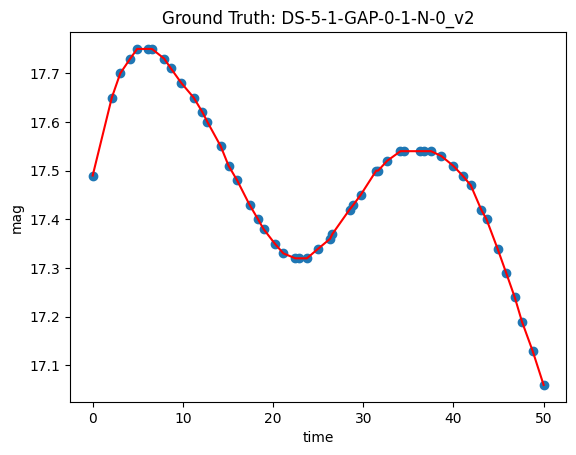

In [1107]:
plt.title(f'Ground Truth: {df_GAP0_N0.name}')

plt.xlabel('time')
plt.ylabel('mag')

plt.plot(df_GAP0_N0[0], df_GAP0_N0[1], 'r')
plt.scatter(df_GAP0_N0[0], df_GAP0_N0[1])

plt.show()

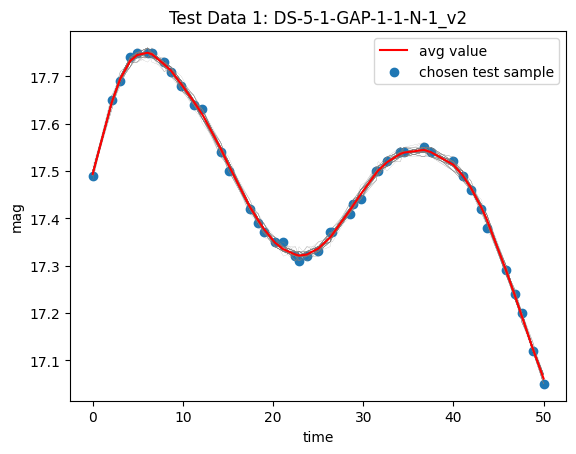

In [1108]:
plt.title(f'Test Data 1: {df_GAP1_N1.name}')

plt.xlabel('time')
plt.ylabel('mag')

for i in range(100):
    plt.plot(df_GAP1_N1[0], df_GAP1_N1[i+1], 'grey', linewidth = '0.1')

A = df_GAP1_N1.iloc[:, 1:101]
A_mean = np.mean(A, axis = 1)
plt.plot(df_GAP1_N1[0], A_mean, 'r', label = 'avg value')
plt.scatter(df_GAP1_N1[0], df_GAP1_N1[1], label = 'chosen test sample')

plt.legend(loc="best")

plt.show()

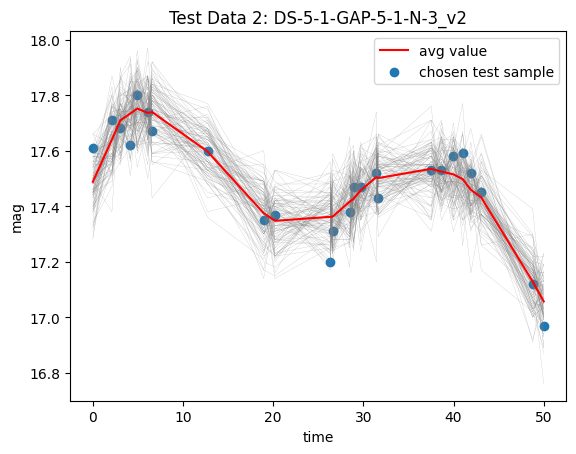

In [1109]:
plt.title(f'Test Data 2: {df_GAP5_N3.name}')

plt.xlabel('time')
plt.ylabel('mag')

for i in range(100):
    plt.plot(df_GAP5_N3[0], df_GAP5_N3[i+1], 'grey', linewidth = '0.1')

A = df_GAP5_N3.iloc[:, 1:101]
A_mean = np.mean(A, axis = 1)
plt.plot(df_GAP5_N3[0], A_mean, 'r', label = 'avg value')
plt.scatter(df_GAP5_N3[0], df_GAP5_N3[1], label = 'chosen test sample')

plt.legend(loc="best")

plt.show()

## **Polynomial Regression (Polynomial Interpolation)**

Testing consisted of generating 20 different approximating functions from degree 1 to 20, and then comparing their MSE values for training data, taken from the noisy samples, and testing data, taken from the GT function. The curve that yielded the lowest MSE value for testing was ultimately chosen as the best fit.

It is important to note that this first testing session uses SciKit-learn built-in methods, where polynomial regression was built as a form of linear regression with a feature space mapping (polynomial kernel). However, this approach does not represent true polynomial regression and instead yields polynomial interpolation between the samples. This can be confirmed when observing the behavior of MSE, since no overfitting occurs even when using extremely high-degree curves.

In [1110]:
#Polynomial interpolation
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

def to_column(series):
    return series.values.reshape(-1, 1)

### **Test Data 1**

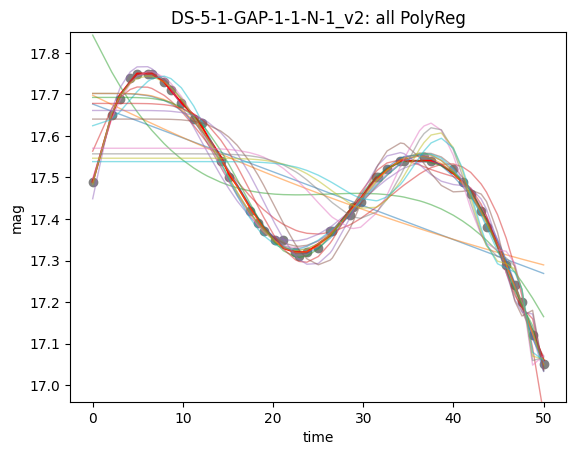

In [1111]:
x_test = to_column(df_GAP0_N0[0])
y_test = to_column(df_GAP0_N0[1])

x_train = to_column(df_GAP1_N1[0])
y_train = to_column(df_GAP1_N1[1])

plt.title(f'{df_GAP1_N1.name}: all PolyReg')
plt.xlabel('time')
plt.ylabel('mag')
plt.scatter(x_train, y_train, color = 'grey')
plt.plot(x_test, y_test, 'r')
plt.ylim(y_test.min() - 0.1, y_test.max() + 0.1)

n0 = 1
nf = 20

MSE_template = {'n':[], 'MSE':[]}

MSE_train = pd.DataFrame(MSE_template)
MSE_test = pd.DataFrame(MSE_template)

model = {}

for n in range(n0, nf + 1):

    # training
    model[n] = Pipeline([('poly', PolynomialFeatures(degree = n, include_bias = False)), ('linear', LinearRegression())])
    model[n].fit(x_train, y_train)

    # testing
    y_pred_train = model[n].predict(x_train)
    y_pred_test = model[n].predict(x_test)

    # evaluation
    MSE_train.loc[n-1] = [n, mean_squared_error(y_train, y_pred_train)]
    MSE_test.loc[n-1] = [n, mean_squared_error(y_test, y_pred_test)]

    plt.plot(x_test, y_pred_test, linewidth = 1, alpha = 0.5)

plt.show()
print()

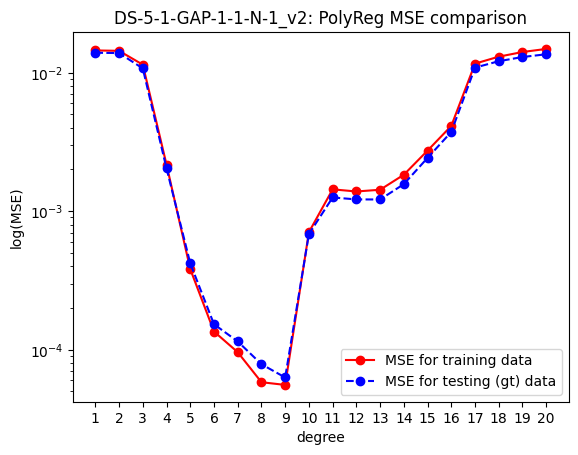

In [1112]:
plt.title(f'{df_GAP1_N1.name}: PolyReg MSE comparison')
plt.xlabel('degree')
plt.ylabel('log(MSE)')
plt.plot(MSE_train['n'], MSE_train['MSE'], '-ro', label = 'MSE for training data')
plt.plot(MSE_test['n'], MSE_test['MSE'], '--bo', label = 'MSE for testing (gt) data')
plt.legend(loc="best")
plt.yscale('log')
plt.xticks(range(n0, nf + 1))
plt.show()

Note a lack of overfitting, and no curves fit the training data perfectly

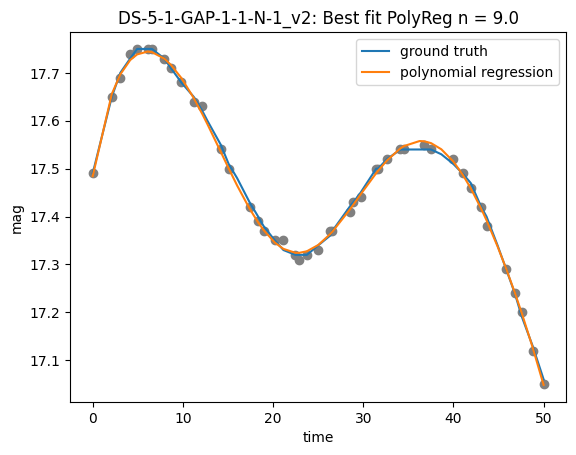

training MSE: 5.559222276712105e-05
testing MSE: 6.290853799429889e-05


In [1113]:
best = MSE_test['n'][MSE_test['MSE'].idxmin()]
y_pred_test = model[best].predict(x_test)

best_MSE_test = MSE_test.loc[MSE_test['n'] == best, 'MSE'].values[0]
best_MSE_train = MSE_train.loc[MSE_train['n'] == best, 'MSE'].values[0]

plt.title(f'{df_GAP1_N1.name}: Best fit PolyReg n = {best}')
plt.xlabel('time')
plt.ylabel('mag')
plt.scatter(x_train, y_train, color = 'gray')
plt.plot(x_test, y_test, label = 'ground truth')
plt.plot(x_test, y_pred_test, label = 'polynomial regression')
plt.legend(loc="best")
plt.show()

print(f'training MSE: {best_MSE_train}')
print(f'testing MSE: {best_MSE_test}')

### **Test Data 2**

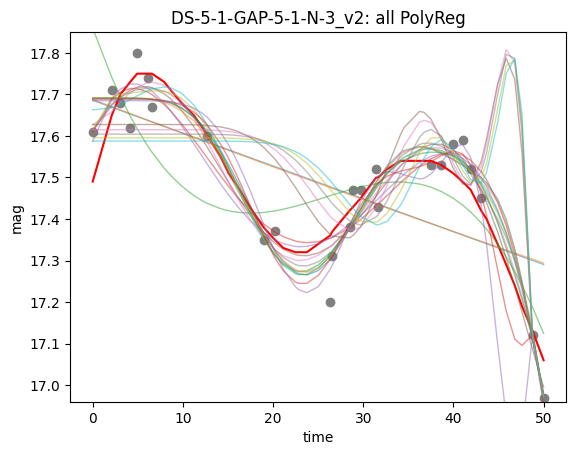

In [1114]:
x_test = to_column(df_GAP0_N0[0])
y_test = to_column(df_GAP0_N0[1])

x_train = to_column(df_GAP5_N3[0])
y_train = to_column(df_GAP5_N3[1])

plt.title(f'{df_GAP5_N3.name}: all PolyReg')
plt.xlabel('time')
plt.ylabel('mag')
plt.scatter(x_train, y_train, color = 'grey')
plt.plot(x_test, y_test, 'r')
plt.ylim(y_test.min() - 0.1, y_test.max() + 0.1)

n0 = 1
nf = 20

MSE_template = {'n':[], 'MSE':[]}

MSE_train = pd.DataFrame(MSE_template)
MSE_test = pd.DataFrame(MSE_template)

model = {}

for n in range(n0, nf + 1):

    # training
    model[n] = Pipeline([('poly', PolynomialFeatures(degree = n, include_bias = False)), ('linear', LinearRegression())])
    model[n].fit(x_train, y_train)

    # testing
    y_pred_train = model[n].predict(x_train)
    y_pred_test = model[n].predict(x_test)

    # evaluation
    MSE_train.loc[n-1] = [n, mean_squared_error(y_train, y_pred_train)]
    MSE_test.loc[n-1] = [n, mean_squared_error(y_test, y_pred_test)]

    plt.plot(x_test, y_pred_test, linewidth = 1, alpha = 0.5)

plt.show()

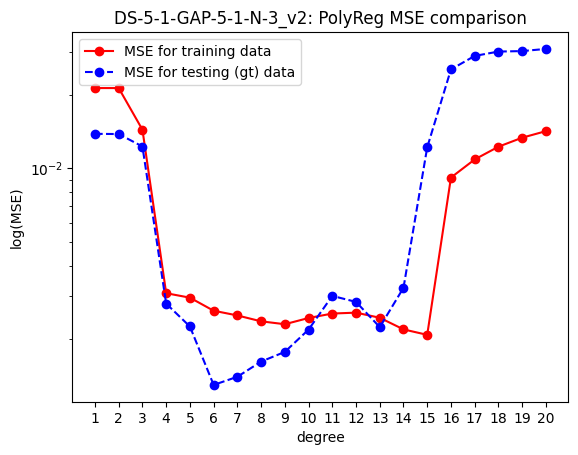

In [1115]:
plt.title(f'{df_GAP5_N3.name}: PolyReg MSE comparison')
plt.xlabel('degree')
plt.ylabel('log(MSE)')
plt.plot(MSE_train['n'], MSE_train['MSE'], '-ro', label = 'MSE for training data')
plt.plot(MSE_test['n'], MSE_test['MSE'], '--bo', label = 'MSE for testing (gt) data')
plt.legend(loc="best")
plt.yscale('log')
plt.xticks(range(n0, nf + 1))
plt.show()

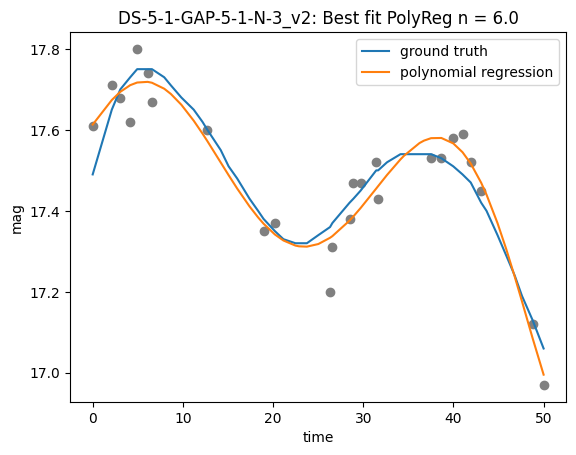

training MSE: 0.002609884681315156
testing MSE: 0.001295502735639484


In [1116]:
best = MSE_test['n'][MSE_test['MSE'].idxmin()]
y_pred_test = model[best].predict(x_test)

best_MSE_test = MSE_test.loc[MSE_test['n'] == best, 'MSE'].values[0]
best_MSE_train = MSE_train.loc[MSE_train['n'] == best, 'MSE'].values[0]

plt.title(f'{df_GAP5_N3.name}: Best fit PolyReg n = {best}')
plt.xlabel('time')
plt.ylabel('mag')
plt.scatter(x_train, y_train, color = 'gray')
plt.plot(x_test, y_test, label = 'ground truth')
plt.plot(x_test, y_pred_test, label = 'polynomial regression')
plt.legend(loc="best")
plt.show()

print(f'training MSE: {best_MSE_train}')
print(f'testing MSE: {best_MSE_test}')

## **Polynomial Regression (True Regression)**

For this session, the same methodology of generating 20 different curves and comparing them was used, now using Numpy’s included polyfit method for computing the coefficients of each polynomial. This results in true polinomial regression, and the high-degree curves now perfectly fit the training data, so overfitting is finally present.

### **Test Data 1**

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


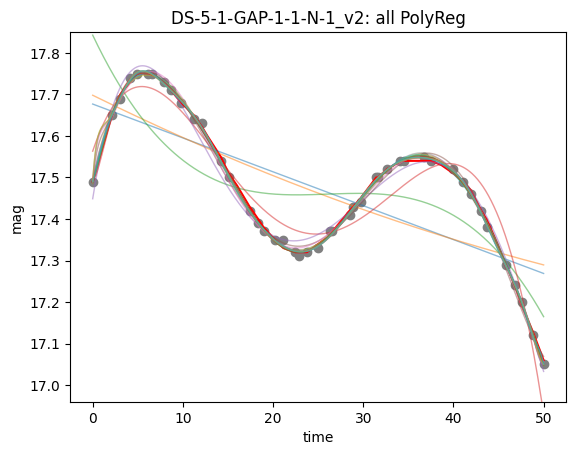

In [1117]:
x_test = to_column(df_GAP0_N0[0])
y_test = to_column(df_GAP0_N0[1])

x_train = to_column(df_GAP1_N1[0])
y_train = to_column(df_GAP1_N1[1])

plt.title(f'{df_GAP1_N1.name}: all PolyReg')
plt.xlabel('time')
plt.ylabel('mag')
plt.scatter(x_train, y_train, color = 'grey')
plt.plot(x_test, y_test, 'r')
plt.ylim(y_test.min() - 0.1, y_test.max() + 0.1)

n0 = 1
nf = 20

MSE_template = {'n':[], 'MSE':[]}

MSE_train = pd.DataFrame(MSE_template)
MSE_test = pd.DataFrame(MSE_template)

model = {}

for n in range(n0, nf + 1):

    # training
    # training
    coef = np.polyfit(x_train.squeeze(), y_train.squeeze(), deg=n)
    model[n] = np.poly1d(coef)

    # testing
    y_pred_train = np.polyval(coef, x_train.squeeze())
    y_pred_test = np.polyval(coef, x_test.squeeze())

    # evaluation
    MSE_train.loc[n - 1] = [n, mean_squared_error(y_train, y_pred_train)]
    MSE_test.loc[n - 1] = [n, mean_squared_error(y_test, y_pred_test)]

    # plot dense graph
    x_test_high_res = np.linspace(x_test.min(), x_test.max(), 1000)
    y_pred_test_high_res = np.polyval(coef, x_test_high_res)
    plt.plot(x_test_high_res, y_pred_test_high_res, linewidth = 1, alpha = 0.5)

plt.show()
print()

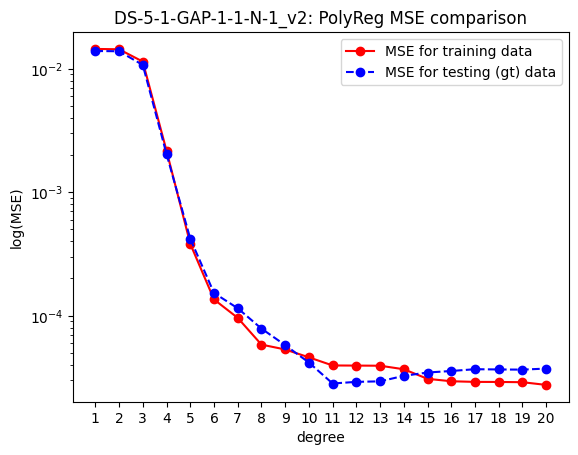

In [1118]:
plt.title(f'{df_GAP1_N1.name}: PolyReg MSE comparison')
plt.xlabel('degree')
plt.ylabel('log(MSE)')
plt.plot(MSE_train['n'], MSE_train['MSE'], '-ro', label = 'MSE for training data')
plt.plot(MSE_test['n'], MSE_test['MSE'], '--bo', label = 'MSE for testing (gt) data')
plt.legend(loc="best")
plt.yscale('log')
plt.xticks(range(n0, nf + 1))
plt.show()

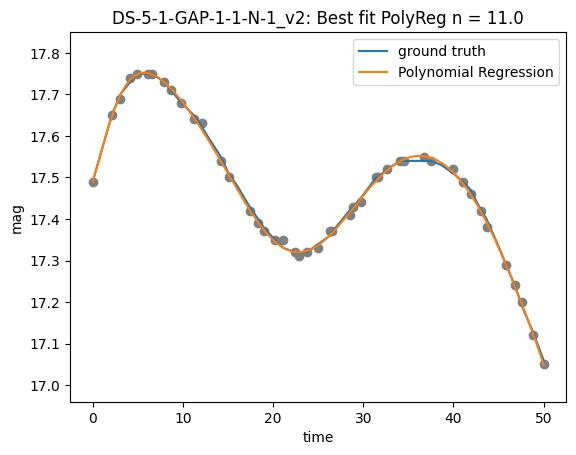

training MSE: 3.941342869860933e-05
testing MSE: 2.81497833836377e-05


In [1119]:
best = best = MSE_test['n'][MSE_test['MSE'].idxmin()]
coef = np.polyfit(x_train.squeeze(), y_train.squeeze(), deg=best)

x_test_high_res = np.linspace(x_test.min(), x_test.max(), 1000)
y_pred_test_high_res = np.polyval(coef, x_test_high_res)

best_MSE_test = MSE_test.loc[MSE_test['n'] == best, 'MSE'].values[0]
best_MSE_train = MSE_train.loc[MSE_train['n'] == best, 'MSE'].values[0]

plt.title(f'{df_GAP1_N1.name}: Best fit PolyReg n = {best}')
plt.ylim(y_test.min() - 0.1, y_test.max() + 0.1)
plt.xlabel('time')
plt.ylabel('mag')
plt.scatter(x_train, y_train, color = 'gray')
plt.plot(x_test, y_test, label = 'ground truth')
plt.plot(x_test_high_res, y_pred_test_high_res, label='Polynomial Regression')
plt.legend(loc="best")
plt.show()

print(f'training MSE: {best_MSE_train}')
print(f'testing MSE: {best_MSE_test}')

### **Test Data 2**

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


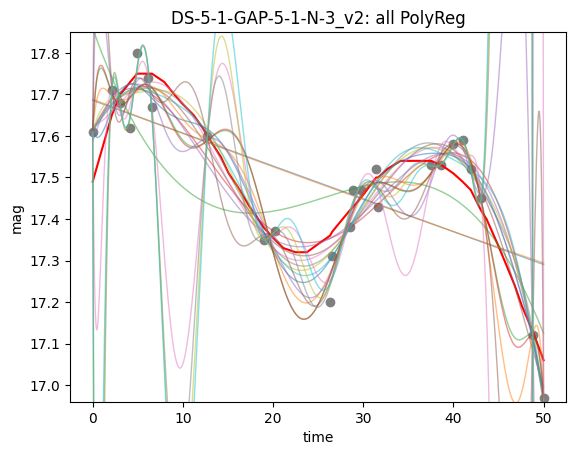

In [1120]:
x_test = to_column(df_GAP0_N0[0])
y_test = to_column(df_GAP0_N0[1])

x_train = to_column(df_GAP5_N3[0])
y_train = to_column(df_GAP5_N3[1])

plt.title(f'{df_GAP5_N3.name}: all PolyReg')
plt.xlabel('time')
plt.ylabel('mag')
plt.scatter(x_train, y_train, color = 'grey')
plt.plot(x_test, y_test, 'r')
plt.ylim(y_test.min() - 0.1, y_test.max() + 0.1)

n0 = 1
nf = 20

MSE_template = {'n':[], 'MSE':[]}

MSE_train = pd.DataFrame(MSE_template)
MSE_test = pd.DataFrame(MSE_template)

model = {}

for n in range(n0, nf + 1):

    # training
    # training
    coef = np.polyfit(x_train.squeeze(), y_train.squeeze(), deg=n)
    model[n] = np.poly1d(coef)

    # testing
    y_pred_train = np.polyval(coef, x_train.squeeze())
    y_pred_test = np.polyval(coef, x_test.squeeze())

    # evaluation
    MSE_train.loc[n - 1] = [n, mean_squared_error(y_train.squeeze(), y_pred_train)]
    MSE_test.loc[n - 1] = [n, mean_squared_error(y_test.squeeze(), y_pred_test)]

    # plot dense graph
    x_test_high_res = np.linspace(x_test.min(), x_test.max(), 1000)
    y_pred_test_high_res = np.polyval(coef, x_test_high_res)
    plt.plot(x_test_high_res, y_pred_test_high_res, linewidth = 1, alpha = 0.5)

plt.show()

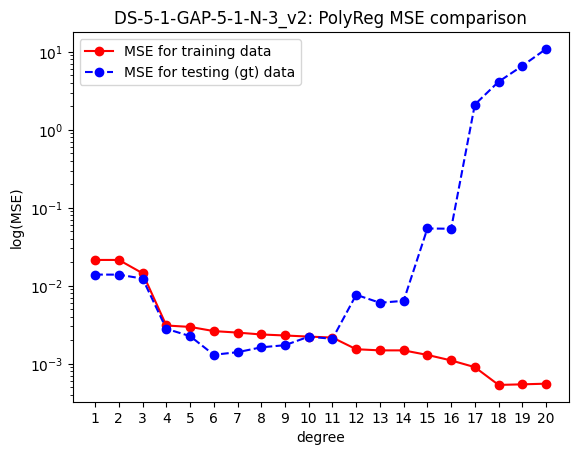

In [1121]:
plt.title(f'{df_GAP5_N3.name}: PolyReg MSE comparison')
plt.xlabel('degree')
plt.ylabel('log(MSE)')
plt.plot(MSE_train['n'], MSE_train['MSE'], '-ro', label = 'MSE for training data')
plt.plot(MSE_test['n'], MSE_test['MSE'], '--bo', label = 'MSE for testing (gt) data')
plt.legend(loc="best")
plt.yscale('log')
plt.xticks(range(n0, nf + 1))
plt.show()

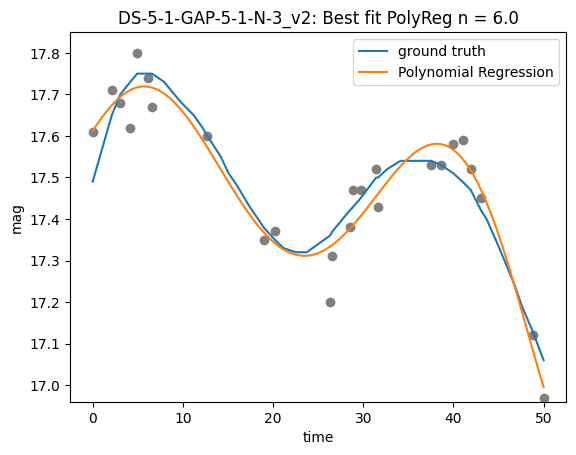

training MSE: 0.002609884681315235
testing MSE: 0.0012955027351582247


In [1122]:
best = best = MSE_test['n'][MSE_test['MSE'].idxmin()]
coef = np.polyfit(x_train.squeeze(), y_train.squeeze(), deg=best)

x_test_high_res = np.linspace(x_test.min(), x_test.max(), 1000)
y_pred_test_high_res = np.polyval(coef, x_test_high_res)

best_MSE_test = MSE_test.loc[MSE_test['n'] == best, 'MSE'].values[0]
best_MSE_train = MSE_train.loc[MSE_train['n'] == best, 'MSE'].values[0]

plt.title(f'{df_GAP5_N3.name}: Best fit PolyReg n = {best}')
plt.ylim(y_test.min() - 0.1, y_test.max() + 0.1)
plt.xlabel('time')
plt.ylabel('mag')
plt.scatter(x_train, y_train, color = 'gray')
plt.plot(x_test, y_test, label = 'ground truth')
plt.plot(x_test_high_res, y_pred_test_high_res, label='Polynomial Regression')
plt.legend(loc="best")
plt.show()

print(f'training MSE: {best_MSE_train}')
print(f'testing MSE: {best_MSE_test}')

## **Conclusions**

Polynomial regression presented an interesting challenge, akin to close relative linear regression. I had originally only concluded one testing session, but after some discussion with my classmates, I realized that overfitting was, in fact, not present in the results, which meant that the instructions provided were not completely accurate. After being stumped for a while, constantly comparing my results with the lecture’s, I finally came across an article about SciKit’s implementation that made sense of this discrepancy. One could say that the lesson is to not take every method for granted, or to at least understand it before applying it and praying it works.

## **References**

Cuevas, J. (2020). Handouts on Classification Algorithms. DOI:10.13140/RG.2.2.23597.03043/1

Shi, A. & Shi, K. (2020). Polynomial Regression with Scikit learn: What You Should Know. https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2

Shi, A. & Shi, K. (2023). The Hidden Linearity in Polynomial Regression. https://towardsdatascience.com/the-hidden-linearity-in-polynomial-regression-333f1bed7aa5
